In [2]:
# read in my network from aracne
import ndex2
import matplotlib.pyplot as plt
import networkx as nx

# import network from my ndex account
cx_object = ndex2.create_nice_cx_from_server(server='www.ndexbio.org', username='livia.songster@gmail.com', password='StGU1sA7~f', uuid='619db8be-087b-11ee-aa50-005056ae23aa')

In [3]:
# print summary of network
cx_object.print_summary()

# Make a networkx object from the Homework_PS2a network using the NiceCX method
network = cx_object.to_networkx(mode='default')

# print node data
# network.nodes.data()


Name: ARACNE network version 1
Nodes: 10244
Edges: 161715
Node Attributes: 66372
Edge Attributes: 485145



In [4]:
# define a function to get the symbol from the node data
def get_symbol_id(node_data):
    if 'symbol' in node_data:
        # get the first symbol
        return node_data['symbol']
    elif 'name' in node_data:
        # use the name attribute if no Uniprot IDs exist
        return node_data['name']
    else:
        # return None if there is no Uniprot ID or name attribute
        return None

# create a dictionary to map node names to Uniprot IDs
mapping = {}

for node in network.nodes:
    node_data = network.nodes[node]
    uniprot_id = get_symbol_id(node_data)
    if uniprot_id is not None:
        mapping[node] = uniprot_id

# relabel the nodes using the mapping dictionary
network = nx.relabel_nodes(network, mapping)

# display the new node labels
# print(network.nodes)
print("There are now ",len(network.nodes),"nodes in the network")

There are now  10213 nodes in the network


In [5]:
# define a function to get all direct neighbors
def get_neighbors(graph, protein, minnodes):
    # get the node corresponding to the protein of interest
    protein_of_interest = None
    
    for node, data in graph.nodes(data=True):
        if data['symbol'] == protein:
            protein_of_interest = node
            break

    # get the direct neighbors of protein
    protein_neighbors = list(graph.neighbors(protein_of_interest))

    # repeat the neighbor-finding process until you have at least 300 nodes
    while len(protein_neighbors) < minnodes:
        # iterate over all the nodes in the current set of neighbors
        for node in protein_neighbors:
            # find all the neighbors of the node in the original 'bioplex' graph
            neighbors = list(graph.neighbors(node))
                
            # add the neighbors to the list if they are not already in it
            for neighbor in neighbors:
                if neighbor not in protein_neighbors:
                    protein_neighbors.append(neighbor)
                    
            # check if we have reached the minimum number of nodes
            if len(protein_neighbors) >= minnodes:
                break
        
    # Extract the subgraph containing only the nodes in 'protein_neighbors'
    subgraph = graph.subgraph(protein_neighbors)
    
    return subgraph

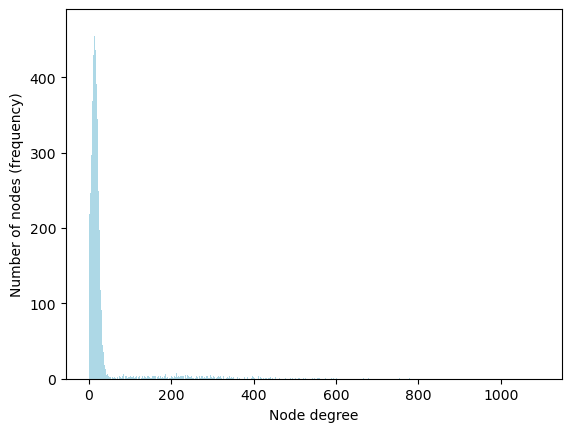

In [6]:
# calculate node degrees in network
degrees = [d for n, d in network.degree()]

# generate histogram bins using networkx function degree_histogram
degree_hist = nx.degree_histogram(network)

# plot it. here, each node degree will be represented as a single bar - there is no binning
plt.hist(degrees, bins=range(len(degree_hist) + 1), align='left', color='lightblue')
plt.xlabel('Node degree')
plt.ylabel('Number of nodes (frequency)')
plt.show()

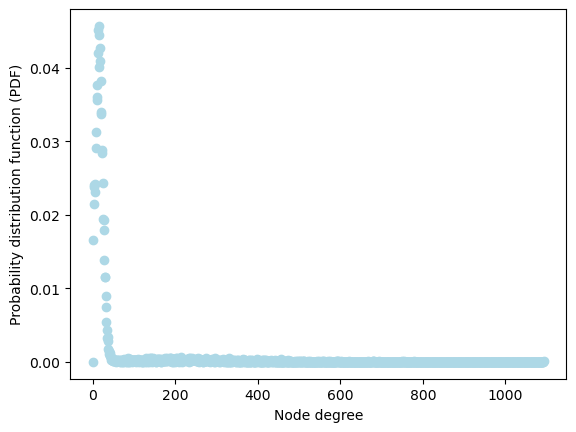

In [7]:
# find the number of nodes
n_nodes = network.number_of_nodes()
# calculate the PDF
degree_pdf = [count/n_nodes for count in degree_hist]

# plot the PDF
plt.plot(range(len(degree_pdf)), degree_pdf, 'o', color='lightblue')
plt.xlabel('Node degree')
plt.ylabel('Probability distribution function (PDF)')
plt.show()

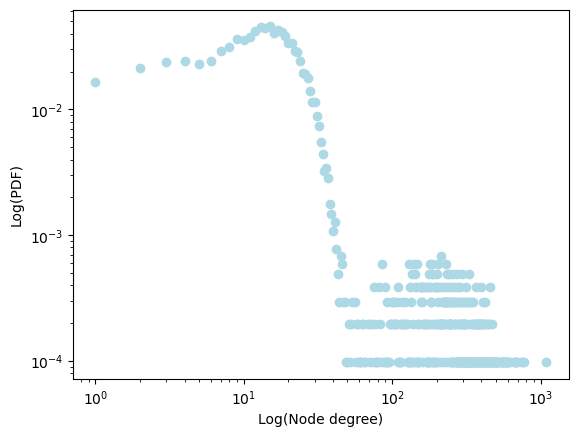

In [8]:
# use loglog
plt.loglog(range(len(degree_pdf)), degree_pdf, 'o', color='lightblue')
plt.xlabel('Log(Node degree)')
plt.ylabel('Log(PDF)')
plt.show()

This network does not appear to be scale free. 

Standard Deviation: 0.07863489513973598
Mean: 0.3645719393629776
Threshold 1: 0.2859370442232416
Threshold 2: 0.4432068345027136


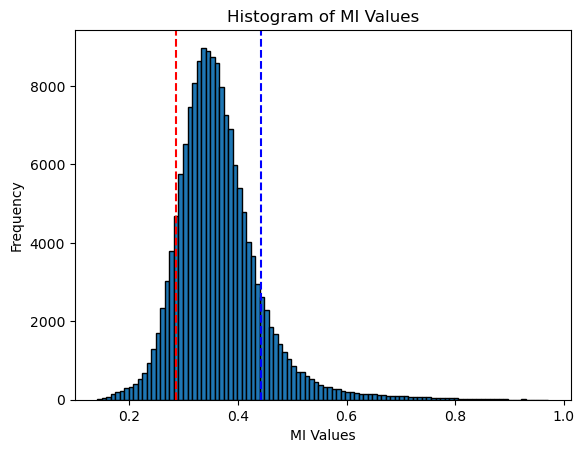

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

edge_data = network.edges.data()

# Extract the 'MI' attribute from the edge data
mi_values = [float(edge[2]['MI']) for edge in edge_data]

# Create a pandas Series with the MI values
mi_series = pd.Series(mi_values)

# find the standard deviation and mean
# Calculate the standard deviation and mean
standard_deviation = np.std(mi_series)
mean = np.mean(mi_series)

# Print the results
print("Standard Deviation:", standard_deviation)
print("Mean:", mean)
# pick threshholds based on the histogram

thresh1 = mean - standard_deviation
thresh2 = mean + standard_deviation
print("Threshold 1:",thresh1)
print("Threshold 2:",thresh2)

# plot the histogram
plt.hist(mi_series, bins=100, edgecolor='black')
plt.xlabel('MI Values')
plt.ylabel('Frequency')
plt.title('Histogram of MI Values')
plt.axvline(x=thresh1, color='red', linestyle='--', label='Threshold 1')
plt.axvline(x=thresh2, color='blue', linestyle='--', label='Threshold 2')
plt.show()


In [15]:
# remove lower p value edges
network0 = network.copy()

# remove edges with weights below threshold 1
edges_to_remove0 = [(u, v) for u, v, data in network0.edges(data=True) if float(data['pvalue']) < 0.01]
network0.remove_edges_from(edges_to_remove0)
network0.remove_nodes_from(list(nx.isolates(network0)))
print("Original Network - Number of nodes:", network.number_of_nodes())
print("Original Network - Number of edges:", network.number_of_edges())

print("Network 0 - Number of nodes:", network0.number_of_nodes())
print("Network 0 - Number of edges:", network0.number_of_edges())

Original Network - Number of nodes: 10213
Original Network - Number of edges: 161715
Network 0 - Number of nodes: 8483
Network 0 - Number of edges: 20369


Standard Deviation: 0.06447155584703024
Mean: 0.33826807067750897
Threshold 1: 0.27379651483047873
Threshold 2: 0.4027396265245392


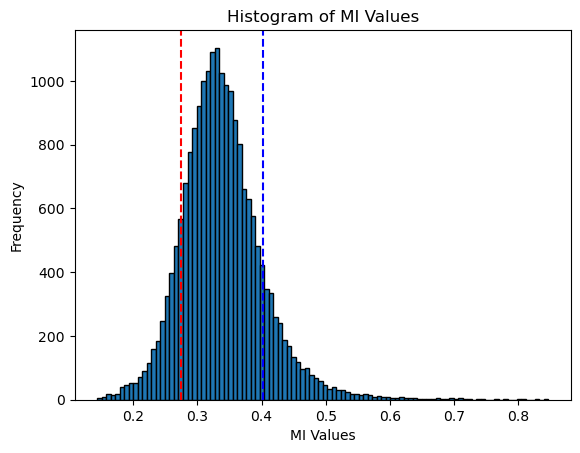

In [16]:
edge_data = network0.edges.data()

# Extract the 'MI' attribute from the edge data
mi_values = [float(edge[2]['MI']) for edge in edge_data]

# Create a pandas Series with the MI values
mi_series = pd.Series(mi_values)

# find the standard deviation and mean
# Calculate the standard deviation and mean
standard_deviation = np.std(mi_series)
mean = np.mean(mi_series)

# Print the results
print("Standard Deviation:", standard_deviation)
print("Mean:", mean)
# pick threshholds based on the histogram

thresh1 = mean - standard_deviation
thresh2 = mean + standard_deviation
print("Threshold 1:",thresh1)
print("Threshold 2:",thresh2)

# plot the histogram
plt.hist(mi_series, bins=100, edgecolor='black')
plt.xlabel('MI Values')
plt.ylabel('Frequency')
plt.title('Histogram of MI Values')
plt.axvline(x=thresh1, color='red', linestyle='--', label='Threshold 1')
plt.axvline(x=thresh2, color='blue', linestyle='--', label='Threshold 2')
plt.show()


In [17]:
# remove lower-MI edges
# create new networks based on the thresholds
network1 = network0.copy()
network2 = network0.copy()

# remove edges with weights below threshold 1
edges_to_remove1 = [(u, v) for u, v, data in network1.edges(data=True) if float(data['MI']) < thresh1]
network1.remove_edges_from(edges_to_remove1)

# remove edges with weights below threshold 2
edges_to_remove2 = [(u, v) for u, v, data in network2.edges(data=True) if float(data['MI']) < thresh2]
network2.remove_edges_from(edges_to_remove2)

# remove disconnected nodes from the networks
network1.remove_nodes_from(list(nx.isolates(network1)))
network2.remove_nodes_from(list(nx.isolates(network2)))

# print the number of nodes and edges in each network
print("Original Network - Number of nodes:", network.number_of_nodes())
print("Original Network - Number of edges:", network.number_of_edges())

print("Network 0 - Number of nodes:", network0.number_of_nodes())
print("Network 0 - Number of edges:", network0.number_of_edges())

print("Network 1 - Number of nodes:", network1.number_of_nodes())
print("Network 1 - Number of edges:", network1.number_of_edges())

print("Network 2 - Number of nodes:", network2.number_of_nodes())
print("Network 2 - Number of edges:", network2.number_of_edges())

Original Network - Number of nodes: 10213
Original Network - Number of edges: 161715
Network 0 - Number of nodes: 8483
Network 0 - Number of edges: 20369
Network 1 - Number of nodes: 7572
Network 1 - Number of edges: 17778
Network 2 - Number of nodes: 2041
Network 2 - Number of edges: 2672


In [18]:
# for network 0:
# calculate node degrees in network
degrees0 = [d for n, d in network0.degree()]

# generate histogram bins using networkx function degree_histogram
degree_hist0 = nx.degree_histogram(network0)

# find the number of nodes
n_nodes0 = network0.number_of_nodes()
# calculate the PDF
degree_pdf0 = [count/n_nodes0 for count in degree_hist0]


# for network 1:
# calculate node degrees in network
degrees1 = [d for n, d in network1.degree()]

# generate histogram bins using networkx function degree_histogram
degree_hist1 = nx.degree_histogram(network1)

# find the number of nodes
n_nodes1 = network1.number_of_nodes()
# calculate the PDF
degree_pdf1 = [count/n_nodes1 for count in degree_hist1]


# for network 2:
# calculate node degrees in network
degrees2 = [d for n, d in network2.degree()]

# generate histogram bins using networkx function degree_histogram
degree_hist2 = nx.degree_histogram(network2)

# find the number of nodes
n_nodes2 = network2.number_of_nodes()
# calculate the PDF
degree_pdf2 = [count/n_nodes2 for count in degree_hist2]

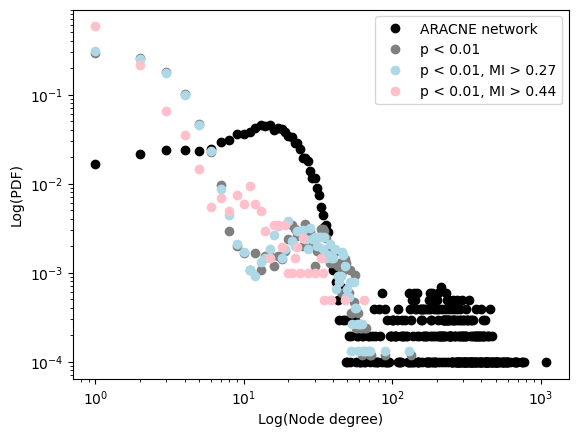

In [19]:
# use loglog
plt.loglog(range(len(degree_pdf)), degree_pdf, 'o', color='black',label='ARACNE network')
plt.loglog(range(len(degree_pdf0)), degree_pdf0, 'o', color='grey',label='p < 0.01')
plt.loglog(range(len(degree_pdf1)), degree_pdf1, 'o', color='lightblue',label='p < 0.01, MI > 0.27')
plt.loglog(range(len(degree_pdf2)), degree_pdf2, 'o', color='pink', label='p < 0.01, MI > 0.44')
plt.xlabel('Log(Node degree)')
plt.ylabel('Log(PDF)')
plt.legend()
plt.show()

In [20]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

# Assuming you have a network object called network0

# Define the range of resolution values to explore
resolution_values = [0.1, 0.5, 1.0, 1.5, 2.0]

# Initialize variables to store the best results
best_resolution = None
best_modularity = float('-inf')
best_community_size_distribution = None

# Iterate through resolution values and evaluate community structure
for resolution in resolution_values:
    # Run the greedy modularity communities algorithm with the current resolution
    communities = greedy_modularity_communities(network0, weight='MI', resolution=resolution)
    
    # Calculate modularity
    curr_modularity = modularity(network0, communities)
    
    # Calculate community size distribution
    community_sizes = [len(community) for community in communities]
    
    # Print the results for the current resolution
    print(f"Resolution: {resolution}")
    print(f"Modularity: {curr_modularity}")
    print(f"Community Size Distribution: {community_sizes}")
    print("----------------------")
    
    # Update the best results if the current resolution yields better modularity
    if curr_modularity > best_modularity:
        best_resolution = resolution
        best_modularity = curr_modularity
        best_community_size_distribution = community_sizes

# Print the best results
print("Best Resolution:", best_resolution)
print("Best Modularity:", best_modularity)
print("Best Community Size Distribution:", best_community_size_distribution)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

Resolution: 0.1
Modularity: 0.0
Community Size Distribution: [8483]
----------------------
Resolution: 0.5
Modularity: 0.3215350744110645
Community Size Distribution: [3837, 3694, 810, 50, 43, 15, 12, 8, 6, 4, 4]
----------------------
Resolution: 1.0
Modularity: 0.4497933255159717
Community Size Distribution: [825, 721, 705, 674, 666, 660, 610, 599, 580, 553, 449, 424, 370, 161, 147, 129, 116, 43, 25, 14, 12]
----------------------
Resolution: 1.5
Modularity: 0.4512505407346974
Community Size Distribution: [439, 396, 395, 393, 390, 381, 355, 344, 337, 331, 329, 324, 321, 317, 316, 304, 291, 274, 261, 236, 215, 200, 198, 155, 153, 146, 145, 139, 101, 83, 63, 56, 52, 43]
----------------------
Resolution: 2.0
Modularity: 0.44795933650492364
Community Size Distribution: [305, 292, 287, 287, 255, 252, 248, 241, 239, 228, 226, 210, 209, 201, 198, 190, 189, 184, 183, 182, 177, 167, 165, 164, 161, 161, 161, 156, 152, 152, 147, 145, 141, 138, 135, 134, 129, 124, 124, 122, 93, 80, 80, 74, 67, 66, 61, 58, 50, 50, 48, 39, 35, 32, 27, 27, 24, 11]
----------------------
Best Resolution: 1.5
Best Modularity: 0.4512505407346974
Best Community Size Distribution: [439, 396, 395, 393, 390, 381, 355, 344, 337, 331, 329, 324, 321, 317, 316, 304, 291, 274, 261, 236, 215, 200, 198, 155, 153, 146, 145, 139, 101, 83, 63, 56, 52, 43]

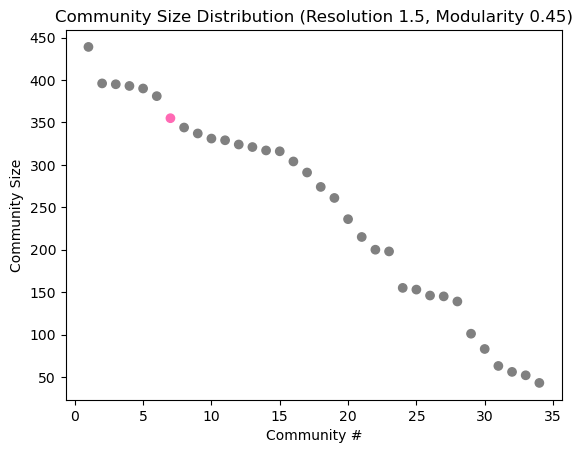

In [37]:
# make a barplot of community sizes
community_numbers = range(1, len(best_community_size_distribution) + 1)
colors = ['hotpink' if num == 7 else 'gray' for num in community_numbers]  # Set color based on condition

plt.scatter(community_numbers, best_community_size_distribution, color=colors)
plt.xlabel("Community #")
plt.ylabel("Community Size")
plt.title("Community Size Distribution (Resolution 1.5, Modularity 0.45)")
plt.show()

In [35]:
for u, v, attrs in network0.edges(data=True):
    print(f"Edge ({u}, {v}) attributes:")
    for key, value in attrs.items():
        print(f"- {key}: {value}")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [34]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

# Compute communities using greedy modularity algorithm
communities0 = greedy_modularity_communities(network0, weight='MI', resolution=1.5)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:

# convert the communities to a list
community_list0 = [list(community) for community in communities0]

# print the list of communities
for i, community in enumerate(community_list0):
    print(f"Community {i+1}: {community}")
    

# add community information as node attribute
community_dict0 = {}
for i, community in enumerate(community_list0):
    for node in community:
        community_dict0[node] = i

# nx.set_node_attributes(network, community_dict, "community0")
nx.set_node_attributes(network0, community_dict0, "community0")

# make a barplot of community sizes
best_community_size_distribution = [len(community) for community in communities]
community_numbers = range(1, len(best_community_size_distribution) + 1)
colors = ['hotpink' if num == 7 else 'gray' for num in community_numbers]  # Set color based on condition

plt.scatter(community_numbers, best_community_size_distribution, color=colors)
plt.xlabel("Community #")
plt.ylabel("Community Size")
plt.title("Community Size Distribution (Resolution 1.5, Modularity 0.45)")
plt.show()

In [47]:
nx.set_node_attributes(network, community_dict0, "community0")

In [48]:
# run this for pxda
# pxda_subgraph = get_neighbors(graph=network0,protein="pxdA",minnodes=10)
# Specify the protein for which you want to identify the community
protein_of_interest = 'pxdA'

# Get the community for the protein of interest
community_of_interest = community_dict0.get(protein_of_interest)

if community_of_interest is not None:
    # Subset the network to include nodes in the community of interest
    nodes_in_community = [node for node, community in community_dict0.items() if community == community_of_interest]
    pxda_subgraph = network.subgraph(nodes_in_community)

    # Print the nodes in the community and the number of nodes and edges in the subset network
    print("Nodes in the community:", nodes_in_community)
    print("Number of nodes in the subset network:", pxda_subgraph.number_of_nodes())
    print("Number of edges in the subset network:", pxda_subgraph.number_of_edges())
else:
    print("Protein not found in the community dictionary.")

print(type(pxda_subgraph))

Nodes in the community: ['AN1887', 'AN7971', 'AN4617', 'AN5711', 'AN4230', 'AN6659', 'AN8735', 'ureB', 'AN11978', 'AN5654', 'CYP620E1', 'benA', 'tim9', 'AN2095', 'AN0698', 'AN6529', 'AN7199', 'artF', 'rpl37', 'AN5677', 'stk22', 'AN5591', 'afcC', 'AN0339', 'AN9162', 'AN10242', 'AN2590', 'AN10875', 'AN6322', 'AN5988', 'AN7597', 'AN5149', 'AN9404', 'AN12480', 'AN11016', 'teaA', 'AN2861', 'AN1013', 'AN5051', 'dfgC', 'AN7339', 'AN6913', 'bioF', 'AN4312', 'AN0815', 'AN6955', 'AN9443', 'AN9437', 'AN4852', 'AN7719', 'AN2734', 'CYP550B2', 'vps11', 'AN10177', 'AN6607', 'AN3006', 'isr1', 'AN3835', 'AN5503', 'mcnA', 'gelD', 'AN7279', 'dopA', 'pbsA', 'metH', 'silA', 'AN6042', 'AN5146', 'AN4405', 'AN1603', 'AN1596', 'AN8732', 'pod6', 'AN0439', 'AN8132', 'AN5945', 'AN7386', 'AN8625', 'AN12359', 'AN2242', 'AN4918', 'AN4627', 'AN2522', 'AN4474', 'AN10410', 'CYP630B2', 'AN1251', 'AN10627', 'AN10949', 'AN11985', 'AN8472', 'AN2715', 'AN0214', 'AN10296', 'AN3183', 'AN4043', 'AN0539', 'AN2532', 'AN7913', 'A

In [49]:
import numpy as np

# write a function
def adjacency_matrix(graph):
    
    # get the list of nodes in the graph
    nodes = list(graph.nodes)
    
    # create an empty adjacency matrix with only zeros
    adj_matrix = np.zeros((len(nodes), len(nodes)))
    
    # loop through each edges to fill in the adjacency matrix
    for edge in graph.edges():
        # i is the start of the edge
        i = nodes.index(edge[0])
        # j is the end of the edge
        j = nodes.index(edge[1])
        # both position ij and ji should have a 1
        adj_matrix[i][j] = 1
        adj_matrix[j][i] = 1  # ensure the matrix is symmetric
    
    return adj_matrix


In [51]:
# run this on my subgraph
pxda_matrix = adjacency_matrix(pxda_subgraph)

print(pxda_matrix)

# check if the matrix is symmetrical
def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)

print("Is the matrix symmetric?",check_symmetric(pxda_matrix))

# Get the neighbors of the node "pxdA"
neighbors = list(pxda_subgraph.neighbors('pxdA'))
print(neighbors)

shared_nodes = []
for edge in pxda_subgraph.edges():
    if 'pxdA' in edge:
        shared_nodes.append(edge[0] if edge[1] == 'pxdA' else edge[1])

print(shared_nodes)
# print(list(pxda_subgraph.nodes()))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Is the matrix symmetric? True
[]
['AN8735', 'lreA', 'rfeB']


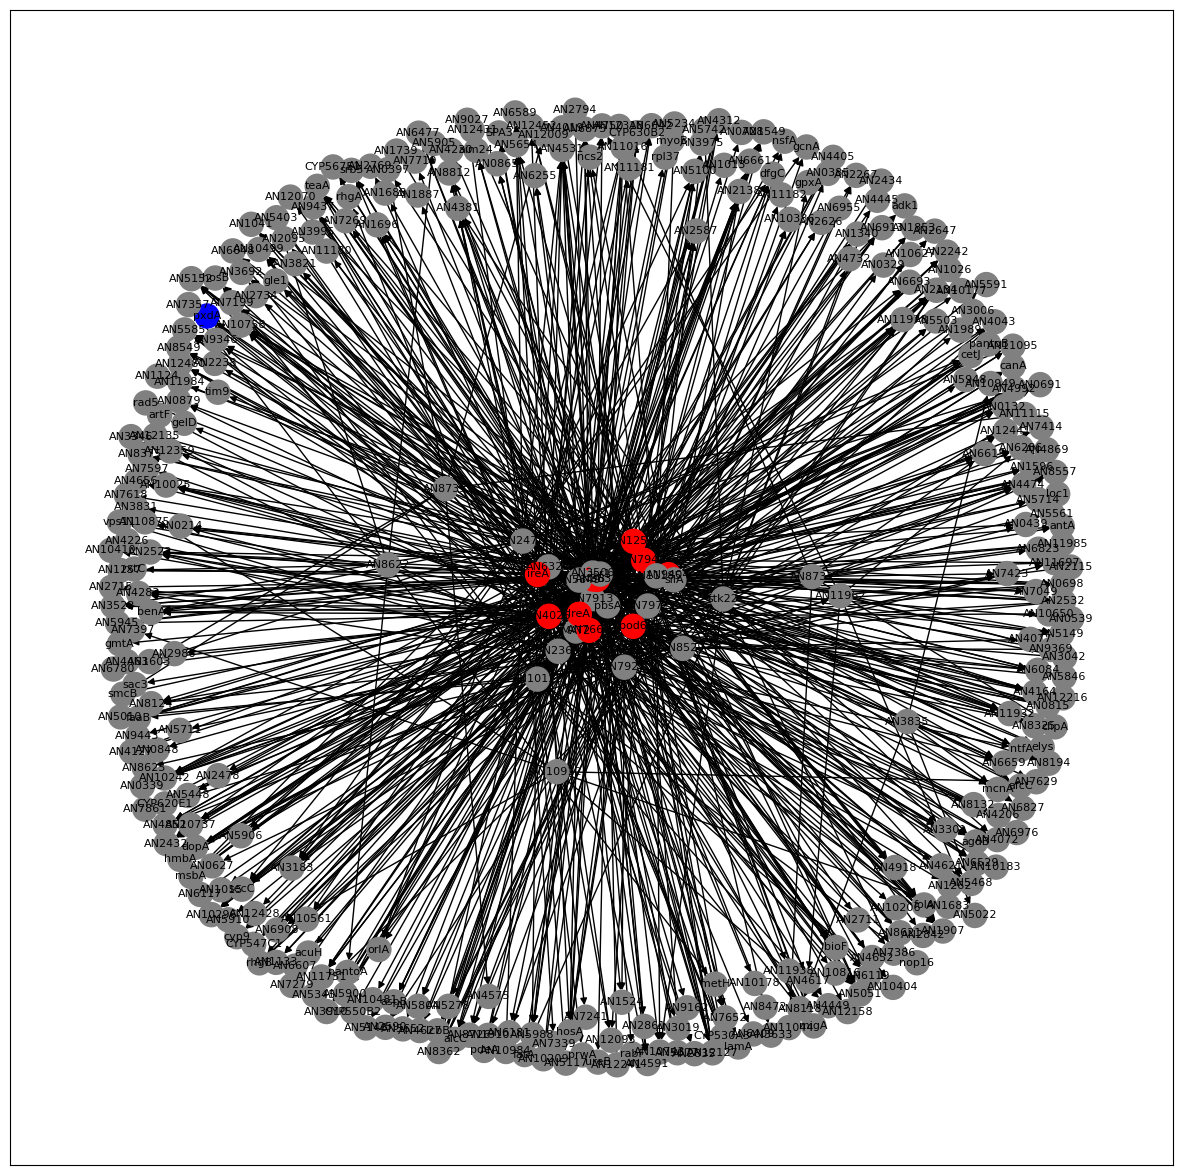

In [53]:
# print the graph
%matplotlib inline
fig = plt.figure(figsize=(15, 15))

# create a list of node colors
node_colors = ['blue' if node == 'pxdA' else 'red' if any(pxda_subgraph.has_edge(node, 'pxdA') for node in pxda_subgraph.neighbors(node)) else 'gray' for node in pxda_subgraph]


# Draw the networkx graph with the specified node colors
nx.draw_networkx(pxda_subgraph, font_size=8, node_color=node_colors)

# Show the graph
plt.show()

In [82]:
# Subsetting the network to include edges connected to "pxdA"
pxda_regs = nx.ego_graph(network, "pxdA",undirected=True)

# Print the nodes and edges in the subgraph
print("Nodes in the subgraph:", pxda_regs.nodes())
# print("Edges in the subgraph:", pxda_subgraph.edges())

# Subsetting the network to include edges connected to "dipA"
dipa_regs = nx.ego_graph(network, "AN10946",undirected=True)

# Print the nodes and edges in the subgraph
print("Nodes in the subgraph:", dipa_regs.nodes())

Nodes in the subgraph: ['imeB', 'AN11093', 'rfeB', 'AN4418', 'kfsA', 'AN8735', 'AN2553', 'lsb6', 'AN5533', 'AN5048', 'pxdA', 'AN8666', 'AN12322', 'lreA', 'ffkG']
Nodes in the subgraph: ['AN2954', 'AN1640', 'AN7407', 'AN1012', 'AN10146', 'AN2250', 'uncA', 'AN3298', 'AN11708', 'AN12458', 'AN2912', 'AN5894', 'par1', 'AN4557', 'AN7700', 'AN4768', 'AN5690', 'AN7263', 'AN2315', 'AN4699', 'AN5312', 'kgdA', 'faaB', 'stcU', 'AN3834', 'AN0036', 'AN7292', 'AN0229', 'AN1067', 'AN1055', 'pam17', 'AN9006', 'AN1361', 'AN1133', 'AN5988', 'stcV', 'preB', 'jenB', 'AN7817', 'nar1', 'AN6189', 'digA', 'AN5590', 'AN7819', 'AN4463', 'AN8390', 'AN4083', 'AN0497', 'AN1462', 'AN4312', 'AN10846', 'AN2211', 'ndxB', 'mlp1', 'AN7489', 'AN11711', 'AN11062', 'AN1931', 'AN5446', 'stcF', 'AN2778', 'AN10177', 'AN8370', 'AN5981', 'AN1700', 'AN3916', 'AN2324', 'AN4592', 'AN1588', 'cak1', 'AN0842', 'AN2226', 'AN4701', 'AN11280', 'AN10247', 'pkiA', 'AN5175', 'AN10870', 'binA', 'AN11079', 'AN5731', 'stcE', 'AN7246', 'kdmA', 

In [54]:
# first get all the neighborhoods for each protein in the graph
def get_all_neighborhoods(graph):
    
    # get all the nodes in the graph
    protein_nodes = list(graph.nodes())
    
    # create a list of neighborhoods for all the proteins in the graph
    neighborhoods = []
    
    for protein in protein_nodes:
        neighbors = list(graph.neighbors(protein))
        neighborhoods.append(neighbors)
    
    return neighborhoods


In [55]:
# run this function on my subgraph
pxda_neighborhoods = get_all_neighborhoods(pxda_subgraph)

# print(pxda_neighborhoods)

In [56]:
# calculate the co-citation matrix for each neighborhood
protein_nodes = list(pxda_subgraph.nodes())
# make an emptry matrix of the correct size
co_citation_matrix = np.zeros((len(protein_nodes), len(protein_nodes)))

# loop through each neighborhood and calculate the cocitation matrix
for neighborhood in pxda_neighborhoods:
    # get the neighborhood
    neighborhood_proteins = list(neighborhood)
    # for each protein i:
    for i in range(len(neighborhood_proteins)):
        # loop through protein j:
        for j in range(i+1, len(neighborhood_proteins)):
            protein1, protein2 = neighborhood_proteins[i], neighborhood_proteins[j]
            # compare the lists in protein1 and protein2 and increment the matrix
            co_citation_matrix[protein_nodes.index(protein1), protein_nodes.index(protein2)] += 1
            co_citation_matrix[protein_nodes.index(protein2), protein_nodes.index(protein1)] += 1

# create a list of protein pairs
protein_pairs = []

# loop through all proteins and add the cocitation values
for i in range(len(protein_nodes)):
    for j in range(i+1, len(protein_nodes)):
        protein_pairs.append((protein_nodes[i], protein_nodes[j], co_citation_matrix[i, j]))

# sort the protein pairs by their co-citation values
protein_pairs.sort(key=lambda x: x[2], reverse=True)

# print the top 10 most co-cited protein pairs
for protein_pair in protein_pairs[:10]:
    # [0] is protein 1, [1] is protein 2, and [3] is the cocitation score
    print(protein_pair[0], protein_pair[1], protein_pair[2])

# get the unique names of the proteins from the top 10
top_proteins = set()

for protein_pair in protein_pairs[:10]:
    top_proteins.add(protein_pair[0])
    top_proteins.add(protein_pair[1])
    
print("The proteins in the top cocitation pairs are:",top_proteins)

hosA AN1907 6.0
AN5051 AN8362 6.0
AN0698 rfeB 5.0
AN2522 AN5051 5.0
AN2522 hmbA 5.0
AN2522 AN8362 5.0
AN12127 hosA 5.0
AN12127 AN1907 5.0
hosA rfeB 5.0
hosA CYP530A3 5.0
The proteins in the top cocitation pairs are: {'hosA', 'rfeB', 'AN1907', 'AN12127', 'AN8362', 'AN5051', 'AN2522', 'CYP530A3', 'AN0698', 'hmbA'}


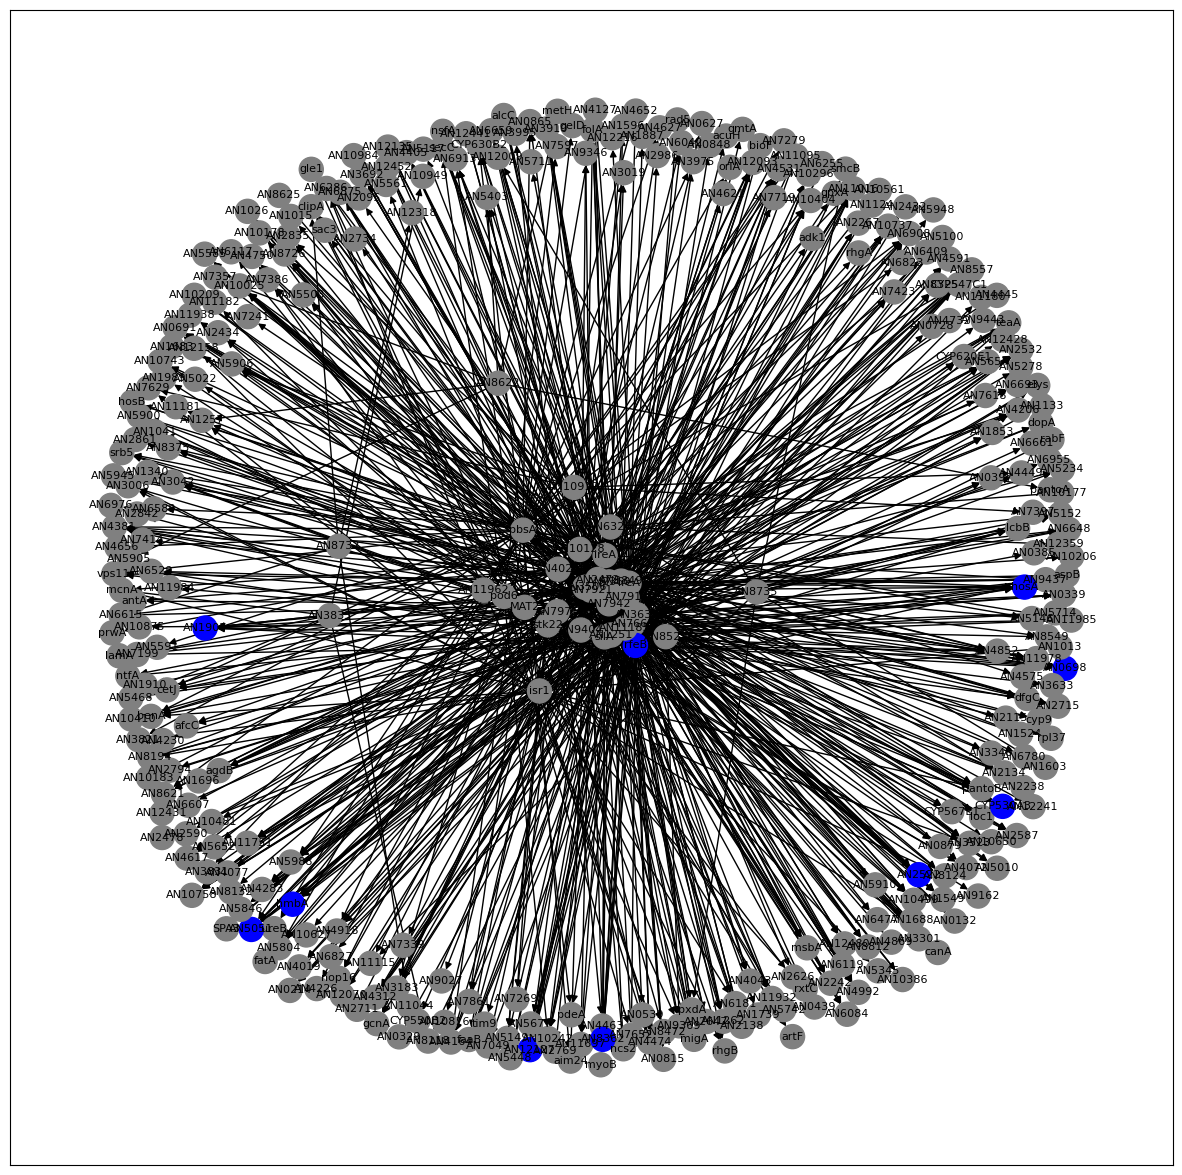

In [57]:
# check if this makes sense in our subgraph:
# print the graph
%matplotlib inline
fig = plt.figure(figsize=(15, 15))

# create a dictionary to store node colors
node_colors = {}

# iterate over all nodes in the graph
for node in pxda_subgraph.nodes():
    # if the node is in the top_proteins set, set its color to blue
    if node in top_proteins:
        node_colors[node] = "blue"
    else:
        node_colors[node] = "grey"

nx.draw_networkx(pxda_subgraph, font_size=8, node_color=[node_colors[node] for node in pxda_subgraph.nodes()])

plt.show()

In [64]:
# check a known pathway
# Specify the protein for which you want to identify the community
protein_of_interest = 'hapX'

# Get the community for the protein of interest
community_of_interest = community_dict0.get(protein_of_interest)

if community_of_interest is not None:
    # Subset the network to include nodes in the community of interest
    nodes_in_community = [node for node, community in community_dict0.items() if community == community_of_interest]
    hapx_subgraph = network.subgraph(nodes_in_community)

    # Print the nodes in the community and the number of nodes and edges in the subset network
    print("Nodes in the community:", nodes_in_community)
    print("Number of nodes in the subset network:", hapx_subgraph.number_of_nodes())
    print("Number of edges in the subset network:", hapx_subgraph.number_of_edges())
else:
    print("Protein not found in the community dictionary.")

print(type(hapx_subgraph))

Nodes in the community: ['AN3058', 'AN4650', 'AN2915', 'AN7559', 'AN5341', 'AN0647', 'AN2848', 'AN2707', 'AN2887', 'amyD', 'AN4191', 'ivoA', 'AN3082', 'AN3760', 'AN1791', 'AN7957', 'AN7738', 'AN6992', 'Pho87', 'AN3743', 'AN9078', 'AN11018', 'AN0282', 'AN10756', 'AN8892', 'srpkF', 'AN8037', 'AN11793', 'sgdA', 'sts1', 'gfdA', 'AN10629', 'AN1790', 'AN6069', 'AN7973', 'AN5574', 'AN10369', 'AN1223', 'AN1130', 'AN2374', 'AN1662', 'AN11489', 'AN10129', 'AN3321', 'fbxB', 'AN4953', 'AN0506', 'AN8335', 'AN7594', 'AN8157', 'AN8681', 'AN11930', 'AN4305', 'AN5268', 'AN1288', 'AN4382', 'hir3', 'AN5237', 'AN11802', 'AN7477', 'AN4963', 'AN9116', 'AN8957', 'AN1438', 'gstA', 'AN5083', 'AN5172', 'AN2218', 'AN2989', 'AN8314', 'AN12180', 'AN9338', 'cia1', 'AN6493', 'AN5476', 'AN9522', 'AN7654', 'ded1', 'AN3240', 'AN0508', 'ffkG', 'AN6602', 'AN11113', 'AN12273', 'AN0903', 'pmaA', 'culA', 'AN12485', 'cetA', 'AN0940', 'pkiC', 'AN8804', 'AN12129', 'AN11718', 'AN1873', 'AN1426', 'AN0092', 'AN3518', 'enaB', 'AN5

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Is the matrix symmetric? True


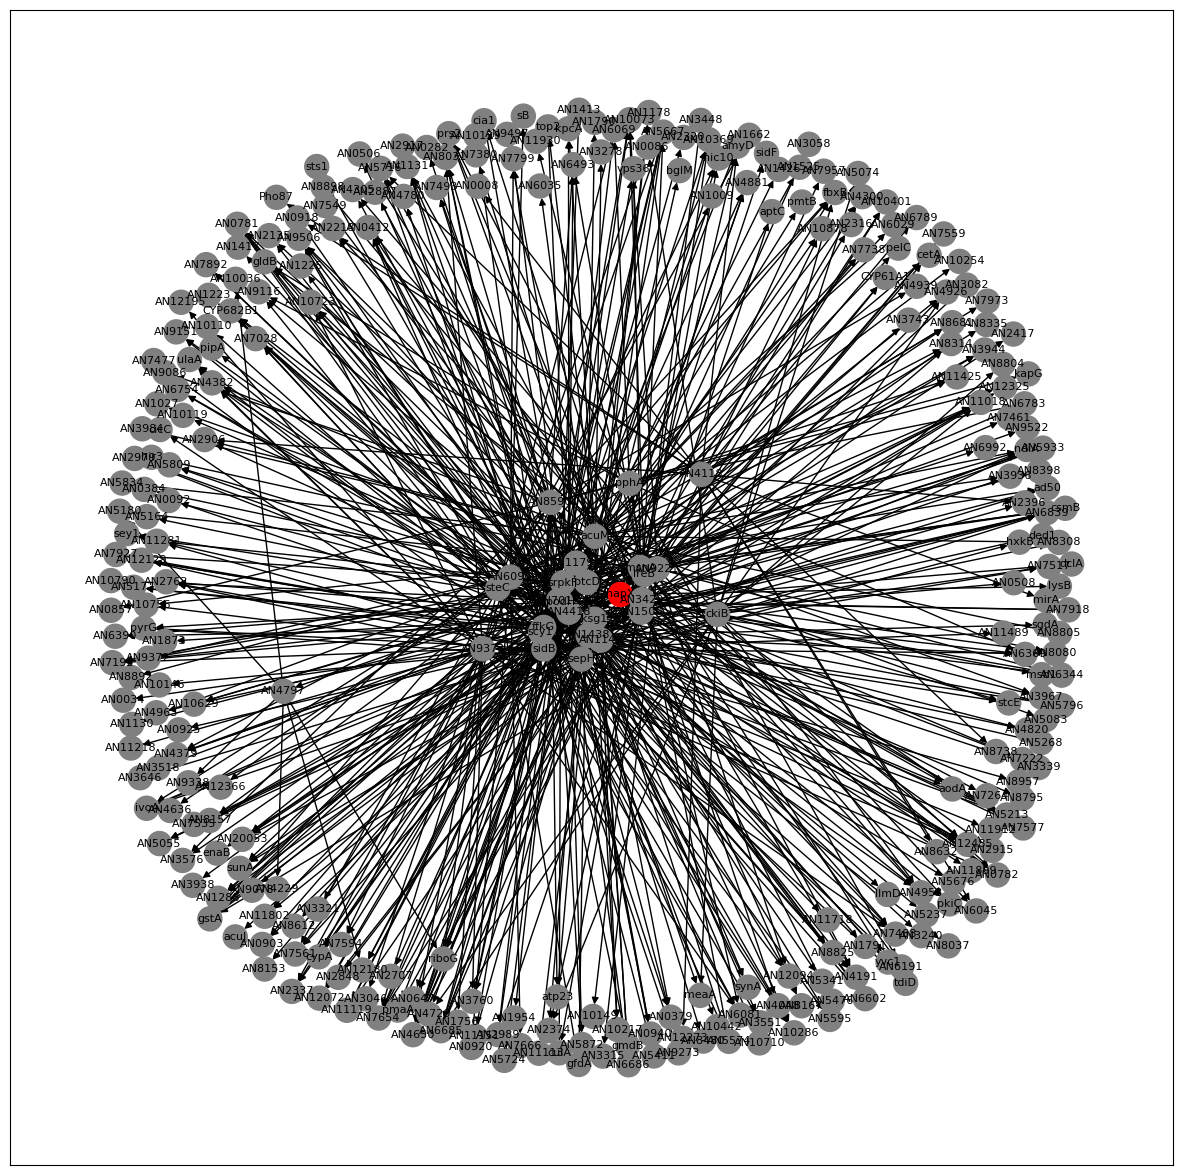

In [65]:
# run this on my subgraph
hapx_matrix = adjacency_matrix(hapx_subgraph)

print(hapx_matrix)

# check if the matrix is symmetrical
def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)

print("Is the matrix symmetric?",check_symmetric(hapx_matrix))

# print the graph
%matplotlib inline
fig = plt.figure(figsize=(15, 15))

# create a list of node colors
node_colors = ['red' if data['symbol'] == 'hapX' else 'gray' for node, data in hapx_subgraph.nodes(data=True)]
nx.draw_networkx(hapx_subgraph, font_size=8, node_color=node_colors)

plt.show()

In [66]:
# check a known pathway
# Specify the protein for which you want to identify the community
protein_of_interest = 'AN10946'

# Get the community for the protein of interest
community_of_interest = community_dict0.get(protein_of_interest)

if community_of_interest is not None:
    # Subset the network to include nodes in the community of interest
    nodes_in_community = [node for node, community in community_dict0.items() if community == community_of_interest]
    dipa_subgraph = network.subgraph(nodes_in_community)

    # Print the nodes in the community and the number of nodes and edges in the subset network
    print("Nodes in the community:", nodes_in_community)
    print("Number of nodes in the subset network:", dipa_subgraph.number_of_nodes())
    print("Number of edges in the subset network:", dipa_subgraph.number_of_edges())
else:
    print("Protein not found in the community dictionary.")

print(type(dipa_subgraph))

Nodes in the community: ['AN5459', 'AN7780', 'cyp5', 'AN0416', 'AN8366', 'AN5036', 'AN10054', 'AN7622', 'AN1445', 'AN4768', 'AN10477', 'AN10323', 'AN8544', 'AN1045', 'AN7701', 'gmdC', 'AN0036', 'mcdA', 'AN7395', 'AN3788', 'AN9006', 'AN1319', 'nucA', 'stu1', 'AN3635', 'AN5409', 'AN10652', 'AN1163', 'AN1964', 'AN3982', 'AN10740', 'ssn3', 'aroC', 'AN11062', 'AN9465', 'AN1880', 'AN3535', 'AN8370', 'AN9300', 'AN1444', 'cak1', 'AN12170', 'lys7', 'AN10247', 'AN7759', 'AN6777', 'fbx15', 'AN10397', 'AN0076', 'AN7194', 'bxlB', 'AN4028', 'AN6237', 'AN0310', 'AN4008', 'AN2057', 'AN8084', 'AN10759', 'AN6479', 'AN10398', 'AN7839', 'AN6710', 'mpkB', 'mndA', 'AN0747', 'AN5638', 'AN10440', 'AN1002', 'AN4217', 'AN4794', 'AN1656', 'AN8191', 'AN8162', 'AN4715', 'AN0630', 'AN7418', 'AN11232', 'AN4777', 'AN4349', 'AN3953', 'AN10227', 'stuA', 'AN5575', 'AN4782', 'AN2304', 'AN6573', 'AN12269', 'AN5927', 'dbaE', 'cmkC', 'AN8175', 'AN12291', 'AN9418', 'AN4497', 'AN2128', 'AN9297', 'AN5778', 'agnC', 'AN2499', 'a

In [83]:
# export these graphs to ndex

dipa_subgraph.name = 'DipA community'
# Generate a NiceCX object
network_cx = ndex2.create_nice_cx_from_networkx(dipa_subgraph)
# print summary of network
network_cx.print_summary()
# upload it to my account in NDEx using the NiceCX method
# create client
client = ndex2.client.Ndex2(username='livia.songster@gmail.com', password='StGU1sA7~f')
# save network to NDEx, value returned is link to raw CX data on server.
client.save_new_network(network_cx.to_cx(), visibility='PRIVATE')

pxda_subgraph.name = 'PxdA community'
# Generate a NiceCX object
network_cx = ndex2.create_nice_cx_from_networkx(pxda_subgraph)
# print summary of network
network_cx.print_summary()
# upload it to my account in NDEx using the NiceCX method
# create client
client = ndex2.client.Ndex2(username='livia.songster@gmail.com', password='StGU1sA7~f')
# save network to NDEx, value returned is link to raw CX data on server.
client.save_new_network(network_cx.to_cx(), visibility='PRIVATE')


pxda_regs.name = 'PxdA regulators'
# Generate a NiceCX object
network_cx = ndex2.create_nice_cx_from_networkx(pxda_regs)
# print summary of network
network_cx.print_summary()
# upload it to my account in NDEx using the NiceCX method
# create client
client = ndex2.client.Ndex2(username='livia.songster@gmail.com', password='StGU1sA7~f')
# save network to NDEx, value returned is link to raw CX data on server.
client.save_new_network(network_cx.to_cx(), visibility='PRIVATE')

hapx_subgraph.name = 'HapX community'
# Generate a NiceCX object
network_cx = ndex2.create_nice_cx_from_networkx(hapx_subgraph)
# print summary of network
network_cx.print_summary()
# upload it to my account in NDEx using the NiceCX method
# create client
client = ndex2.client.Ndex2(username='livia.songster@gmail.com', password='StGU1sA7~f')
# save network to NDEx, value returned is link to raw CX data on server.
client.save_new_network(network_cx.to_cx(), visibility='PRIVATE')


Name: DipA community
Nodes: 329
Edges: 607
Node Attributes: 2498
Edge Attributes: 1821

Generating CX
Name: PxdA community
Nodes: 355
Edges: 869
Node Attributes: 2696
Edge Attributes: 2607

Generating CX
Name: PxdA regulators
Nodes: 15
Edges: 30
Node Attributes: 118
Edge Attributes: 90

Generating CX
Name: HapX community
Nodes: 316
Edges: 639
Node Attributes: 2400
Edge Attributes: 1917

Generating CX


'https://www.ndexbio.org/v2/network/9649d711-0a10-11ee-aa50-005056ae23aa'

In [84]:
# run this function on my subgraph
hapx_neighborhoods = get_all_neighborhoods(hapx_subgraph)

# calculate the co-citation matrix for each neighborhood
protein_nodes = list(hapx_subgraph.nodes())
# make an emptry matrix of the correct size
co_citation_matrix = np.zeros((len(protein_nodes), len(protein_nodes)))

# loop through each neighborhood and calculate the cocitation matrix
for neighborhood in hapx_neighborhoods:
    # get the neighborhood
    neighborhood_proteins = list(neighborhood)
    # for each protein i:
    for i in range(len(neighborhood_proteins)):
        # loop through protein j:
        for j in range(i+1, len(neighborhood_proteins)):
            protein1, protein2 = neighborhood_proteins[i], neighborhood_proteins[j]
            # compare the lists in protein1 and protein2 and increment the matrix
            co_citation_matrix[protein_nodes.index(protein1), protein_nodes.index(protein2)] += 1
            co_citation_matrix[protein_nodes.index(protein2), protein_nodes.index(protein1)] += 1

# create a list of protein pairs
protein_pairs = []

# loop through all proteins and add the cocitation values
for i in range(len(protein_nodes)):
    for j in range(i+1, len(protein_nodes)):
        protein_pairs.append((protein_nodes[i], protein_nodes[j], co_citation_matrix[i, j]))

# sort the protein pairs by their co-citation values
protein_pairs.sort(key=lambda x: x[2], reverse=True)

# print the top 10 most co-cited protein pairs
for protein_pair in protein_pairs[:10]:
    # [0] is protein 1, [1] is protein 2, and [3] is the cocitation score
    print(protein_pair[0], protein_pair[1], protein_pair[2])

# get the unique names of the proteins from the top 10
top_proteins = set()

for protein_pair in protein_pairs[:10]:
    top_proteins.add(protein_pair[0])
    top_proteins.add(protein_pair[1])
    
print("The proteins in the top cocitation pairs are:",top_proteins)

AN4650 AN5667 6.0
AN4650 CYP682B1 4.0
AN4650 AN8031 4.0
AN4650 AN0781 4.0
AN4650 AN12485 4.0
AN4650 AN6685 4.0
AN4650 AN7488 4.0
AN11018 AN4953 4.0
AN6685 steC 4.0
AN4650 ivoA 3.0
The proteins in the top cocitation pairs are: {'AN8031', 'AN12485', 'AN4650', 'steC', 'AN4953', 'ivoA', 'AN5667', 'AN0781', 'AN11018', 'AN7488', 'AN6685', 'CYP682B1'}
